In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('../data/transaction_data_clean.csv')

In [3]:
d.head(5)

,Unnamed: 0,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month,year,day,transaction_date
0,0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2,2019,2,02-02-2019
1,1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,12,2018,26,26-12-2018
2,2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2,2019,15,15-02-2019
3,3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,6,2018,22,22-06-2018
4,4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,9,2018,10,10-09-2018


# Task
We want to do a cohort analysis based on when the users started using our service and their retention levels

In [4]:
d['ItemDescription'].unique()[:30]

array(['FAMILY ALBUM WHITE PICTURE FRAME', 'LONDON BUS COFFEE MUG',
       'SET 12 COLOUR PENCILS DOLLY GIRL ', 'UNION JACK FLAG LUGGAGE TAG',
       'WASHROOM METAL SIGN', 'CUT GLASS T-LIGHT HOLDER OCTAGON',
       'NATURAL SLATE CHALKBOARD LARGE ', 'SKULLS WRITING SET ',
       'MULTI COLOUR SILVER T-LIGHT HOLDER',
       'SET OF 6 RIBBONS PERFECTLY PRETTY  ', 'RED  HARMONICA IN BOX ',
       'WOODEN BOX OF DOMINOES', 'SET OF 5 MINI GROCERY MAGNETS',
       'LUNCH BAG RED RETROSPOT', 'FOLDING UMBRELLA CREAM POLKADOT',
       'ALARM CLOCK BAKELIKE GREEN', 'CARD CIRCUS PARADE',
       'VINTAGE CHRISTMAS TABLECLOTH', 'SET OF 3 HEART COOKIE CUTTERS',
       'PACK OF 12 SUKI TISSUES ', 'PINK BABY BUNTING',
       'DISCO BALL CHRISTMAS DECORATION', 'WOODEN SKITTLES GARDEN SET',
       'ROLL WRAP VINTAGE CHRISTMAS', 'OWL DOORSTOP',
       'FOOD CONTAINER SET 3 LOVE HEART ',
       'PINK  HEART SHAPE LOVE BUCKET ', 'FELTCRAFT GIRL NICOLE KIT',
       'LUNCH BOX WITH CUTLERY RETROSPOT ',
    

In [8]:
d.groupby('Country')['UserId'].nunique()

Country
Australia                  9
Austria                   11
Bahrain                    3
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       4
European Community         1
Finland                   12
France                    88
Germany                   95
Greece                     4
Hong Kong                  1
Iceland                    1
Israel                     5
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  20
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               22
USA   

In [18]:
# Since almost all customers are from the UK, we divide users in two groups - form the UK and other
d['Region'] = np.where(d.Country == 'United Kingdom', 'United Kingdom', 'other')

In [10]:
# Remove invalid users
d = d[d.UserId > 0]

In [26]:
d['transaction_date'] = d['transaction_date'].apply(pd.to_datetime)

In [34]:
d.groupby('UserId')['transaction_date'].min()

UserId
259266   2018-01-04
259287   2018-06-19
259308   2018-02-27
259329   2019-02-02
259350   2018-04-16
            ...    
383880   2018-05-19
383901   2018-08-24
383922   2018-10-17
383943   2018-03-07
384027   2018-03-08
Name: transaction_date, Length: 4372, dtype: datetime64[ns]

In [37]:
d['start_date'] = d.groupby('UserId')['transaction_date'].transform('min')

In [38]:
d['start_date']

0         2018-03-27
1         2018-02-19
2         2018-12-17
3         2018-01-04
5         2018-08-24
             ...    
1083812   2018-09-19
1083813   2018-01-04
1083814   2018-02-14
1083816   2018-01-06
1083817   2018-01-05
Name: start_date, Length: 813658, dtype: datetime64[ns]

In [39]:
d.head(4)

,Unnamed: 0,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,month,year,day,transaction_date,Region,start_date
0,0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2,2019,2,2019-02-02,United Kingdom,2018-03-27
1,1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,12,2018,26,2018-12-26,United Kingdom,2018-02-19
2,2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2,2019,15,2019-02-15,other,2018-12-17
3,3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,6,2018,22,2018-06-22,United Kingdom,2018-01-04


In [42]:
dd = d \
    .groupby(['UserId', 'transaction_date', 'start_date', 'Region'], as_index=False) \
    ['TransactionId'].nunique()

In [43]:
dd

,UserId,transaction_date,start_date,Region,TransactionId
0,259266,2018-01-04,2018-01-04,United Kingdom,2
1,259287,2018-06-19,2018-06-19,other,1
2,259287,2018-08-21,2018-06-19,other,1
3,259287,2018-09-04,2018-06-19,other,1
4,259287,2018-10-14,2018-06-19,other,1
...,...,...,...,...,...
19291,383943,2019-08-01,2018-03-07,United Kingdom,1
19292,383943,2019-11-02,2018-03-07,United Kingdom,1
19293,384027,2018-03-08,2018-03-08,United Kingdom,1
19294,384027,2018-12-24,2018-03-08,United Kingdom,1


In [44]:
dd['start_month'] = dd['start_date'].apply(lambda x: x.replace(day=1))

In [45]:
dd

,UserId,transaction_date,start_date,Region,TransactionId,start_month
0,259266,2018-01-04,2018-01-04,United Kingdom,2,2018-01-01
1,259287,2018-06-19,2018-06-19,other,1,2018-06-01
2,259287,2018-08-21,2018-06-19,other,1,2018-06-01
3,259287,2018-09-04,2018-06-19,other,1,2018-06-01
4,259287,2018-10-14,2018-06-19,other,1,2018-06-01
...,...,...,...,...,...,...
19291,383943,2019-08-01,2018-03-07,United Kingdom,1,2018-03-01
19292,383943,2019-11-02,2018-03-07,United Kingdom,1,2018-03-01
19293,384027,2018-03-08,2018-03-08,United Kingdom,1,2018-03-01
19294,384027,2018-12-24,2018-03-08,United Kingdom,1,2018-03-01


In [46]:
dd['months_diff'] = dd['transaction_date'] - dd['start_date']

In [58]:
dd['months_diff'] = dd['months_diff'].apply(lambda x: int(x.days/30))

AttributeError: 'int' object has no attribute 'days'

In [55]:
dd

,UserId,transaction_date,start_date,Region,TransactionId,start_month,months_diff
0,259266,2018-01-04,2018-01-04,United Kingdom,2,2018-01-01,0
1,259287,2018-06-19,2018-06-19,other,1,2018-06-01,0
2,259287,2018-08-21,2018-06-19,other,1,2018-06-01,2
3,259287,2018-09-04,2018-06-19,other,1,2018-06-01,2
4,259287,2018-10-14,2018-06-19,other,1,2018-06-01,3
...,...,...,...,...,...,...,...
19291,383943,2019-08-01,2018-03-07,United Kingdom,1,2018-03-01,17
19292,383943,2019-11-02,2018-03-07,United Kingdom,1,2018-03-01,20
19293,384027,2018-03-08,2018-03-08,United Kingdom,1,2018-03-01,0
19294,384027,2018-12-24,2018-03-08,United Kingdom,1,2018-03-01,9


In [57]:
dd = dd[dd.start_month<'2019-01-01']

In [59]:
dd

,UserId,transaction_date,start_date,Region,TransactionId,start_month,months_diff
0,259266,2018-01-04,2018-01-04,United Kingdom,2,2018-01-01,0
1,259287,2018-06-19,2018-06-19,other,1,2018-06-01,0
2,259287,2018-08-21,2018-06-19,other,1,2018-06-01,2
3,259287,2018-09-04,2018-06-19,other,1,2018-06-01,2
4,259287,2018-10-14,2018-06-19,other,1,2018-06-01,3
...,...,...,...,...,...,...,...
19291,383943,2019-08-01,2018-03-07,United Kingdom,1,2018-03-01,17
19292,383943,2019-11-02,2018-03-07,United Kingdom,1,2018-03-01,20
19293,384027,2018-03-08,2018-03-08,United Kingdom,1,2018-03-01,0
19294,384027,2018-12-24,2018-03-08,United Kingdom,1,2018-03-01,9


In [62]:
users = dd.groupby(['start_month', 'months_diff', 'Region'], as_index=False)['UserId'].nunique()

In [63]:
cohorts = users.pivot_table(index=['start_month', 'Region'], columns='months_diff', values='UserId')

In [64]:
cohorts

months_diff                   0      1      2      3      4      5      6    \
start_month Region                                                            
2018-01-01  United Kingdom  359.0  161.0  121.0  130.0  142.0  166.0  152.0   
            other            50.0   21.0   18.0   14.0   21.0   17.0   23.0   
2018-02-01  United Kingdom  811.0  240.0  254.0  211.0  227.0  271.0  247.0   
            other            72.0   22.0   32.0   25.0   22.0   21.0   24.0   
2018-03-01  United Kingdom  340.0   60.0   75.0   82.0  104.0   99.0   65.0   
            other            49.0    7.0    5.0    8.0   11.0    8.0    7.0   
2018-04-01  United Kingdom  332.0   51.0   55.0   88.0   69.0   64.0   67.0   
            other            50.0   12.0   10.0   10.0   13.0    8.0   15.0   
2018-05-01  United Kingdom  321.0   44.0   63.0   55.0   64.0   53.0   63.0   
            other            26.0    4.0    5.0    6.0    NaN    3.0    4.0   
2018-06-01  United Kingdom  230.0   38.0   34.0   39.0   38.0   37.0   39.0   
            other            23.0    6.0    3.0    5.0    1.0    2.0    4.0   
2018-07-01  United Kingdom  229.0   43.0   28.0   30.0   33.0   37.0   54.0   
            other            20.0    3.0    NaN    1.0    2.0    8.0    4.0   
2018-08-01  United Kingdom  179.0   22.0   28.0   26.0   30.0   29.0   10.0   
            other            16.0    2.0    5.0    3.0    4.0    5.0    NaN   
2018-09-01  United Kingdom  153.0   24.0   26.0   27.0   29.0   13.0    2.0   
            other            15.0    3.0    5.0    3.0    2.0    1.0    NaN   
2018-10-01  United Kingdom  133.0   16.0   28.0   31.0    4.0    3.0    3.0   
            other            19.0    2.0    3.0    2.0    1.0    NaN    NaN   
2018-11-01  United Kingdom  145.0   28.0   28.0    6.0    4.0    7.0    1.0   
            other            13.0    3.0    NaN    2.0    1.0    NaN    NaN   
2018-12-01  United Kingdom  262.0   44.0   14.0    5.0    6.0    5.0    3.0   
            other            27.0    4.0    3.0    2.0    NaN    NaN    1.0   

months_diff                   7      8      9    ...  114  115  116  117  118  \
start_month Region                               ...                            
2018-01-01  United Kingdom  167.0  157.0  143.0  ...  NaN  NaN  NaN  NaN  NaN   
            other            23.0   22.0   22.0  ...  NaN  NaN  NaN  NaN  NaN   
2018-02-01  United Kingdom  245.0  228.0  239.0  ...  NaN  NaN  NaN  NaN  NaN   
            other            21.0   15.0   23.0  ...  NaN  NaN  NaN  NaN  NaN   
2018-03-01  United Kingdom   81.0   88.0  100.0  ...  NaN  NaN  NaN  NaN  NaN   
            other            11.0   12.0   10.0  ...  NaN  NaN  NaN  NaN  NaN   
2018-04-01  United Kingdom   60.0   73.0   78.0  ...  NaN  NaN  NaN  NaN  NaN   
            other             5.0   14.0    9.0  ...  NaN  NaN  NaN  NaN  NaN   
2018-05-01  United Kingdom   59.0   57.0   31.0  ...  NaN  NaN  NaN  NaN  3.0   
            other             7.0    5.0    2.0  ...  NaN  NaN  NaN  NaN  NaN   
2018-06-01  United Kingdom   33.0   12.0    1.0  ...  NaN  NaN  NaN  2.0  NaN   
            other             4.0    1.0    1.0  ...  NaN  NaN  NaN  1.0  NaN   
2018-07-01  United Kingdom   13.0    8.0    6.0  ...  NaN  NaN  1.0  NaN  NaN   
            other             1.0    NaN    1.0  ...  NaN  NaN  NaN  NaN  NaN   
2018-08-01  United Kingdom    1.0    3.0    4.0  ...  NaN  1.0  NaN  NaN  NaN   
            other             NaN    NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN   
2018-09-01  United Kingdom    5.0    3.0    4.0  ...  NaN  NaN  NaN  NaN  NaN   
            other             NaN    NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN   
2018-10-01  United Kingdom    1.0    1.0    2.0  ...  1.0  NaN  NaN  NaN  NaN   
            other             NaN    NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN   
2018-11-01  United Kingdom    1.0    6.0    2.0  ...  NaN  NaN  NaN  NaN  NaN   
            other             NaN    NaN    NaN  ...  NaN  NaN  NaN  NaN  NaN   
2

In [66]:
cohorts_size = cohorts.iloc[:,0]
cohorts_size

start_month  Region        
2018-01-01   United Kingdom    359.0
             other              50.0
2018-02-01   United Kingdom    811.0
             other              72.0
2018-03-01   United Kingdom    340.0
             other              49.0
2018-04-01   United Kingdom    332.0
             other              50.0
2018-05-01   United Kingdom    321.0
             other              26.0
2018-06-01   United Kingdom    230.0
             other              23.0
2018-07-01   United Kingdom    229.0
             other              20.0
2018-08-01   United Kingdom    179.0
             other              16.0
2018-09-01   United Kingdom    153.0
             other              15.0
2018-10-01   United Kingdom    133.0
             other              19.0
2018-11-01   United Kingdom    145.0
             other              13.0
2018-12-01   United Kingdom    262.0
             other              27.0
Name: 0, dtype: float64

In [68]:
retention = cohorts.divide(cohorts_size, axis=0)
retention

months_diff                 0         1         2         3         4    \
start_month Region                                                        
2018-01-01  United Kingdom  1.0  0.448468  0.337047  0.362117  0.395543   
            other           1.0  0.420000  0.360000  0.280000  0.420000   
2018-02-01  United Kingdom  1.0  0.295931  0.313194  0.260173  0.279901   
            other           1.0  0.305556  0.444444  0.347222  0.305556   
2018-03-01  United Kingdom  1.0  0.176471  0.220588  0.241176  0.305882   
            other           1.0  0.142857  0.102041  0.163265  0.224490   
2018-04-01  United Kingdom  1.0  0.153614  0.165663  0.265060  0.207831   
            other           1.0  0.240000  0.200000  0.200000  0.260000   
2018-05-01  United Kingdom  1.0  0.137072  0.196262  0.171340  0.199377   
            other           1.0  0.153846  0.192308  0.230769       NaN   
2018-06-01  United Kingdom  1.0  0.165217  0.147826  0.169565  0.165217   
            other           1.0  0.260870  0.130435  0.217391  0.043478   
2018-07-01  United Kingdom  1.0  0.187773  0.122271  0.131004  0.144105   
            other           1.0  0.150000       NaN  0.050000  0.100000   
2018-08-01  United Kingdom  1.0  0.122905  0.156425  0.145251  0.167598   
            other           1.0  0.125000  0.312500  0.187500  0.250000   
2018-09-01  United Kingdom  1.0  0.156863  0.169935  0.176471  0.189542   
            other           1.0  0.200000  0.333333  0.200000  0.133333   
2018-10-01  United Kingdom  1.0  0.120301  0.210526  0.233083  0.030075   
            other           1.0  0.105263  0.157895  0.105263  0.052632   
2018-11-01  United Kingdom  1.0  0.193103  0.193103  0.041379  0.027586   
            other           1.0  0.230769       NaN  0.153846  0.076923   
2018-12-01  United Kingdom  1.0  0.167939  0.053435  0.019084  0.022901   
            other           1.0  0.148148  0.111111  0.074074       NaN   

months_diff                      5         6         7         8         9    \
start_month Region                                                             
2018-01-01  United Kingdom  0.462396  0.423398  0.465181  0.437326  0.398329   
            other           0.340000  0.460000  0.460000  0.440000  0.440000   
2018-02-01  United Kingdom  0.334155  0.304562  0.302096  0.281134  0.294698   
            other           0.291667  0.333333  0.291667  0.208333  0.319444   
2018-03-01  United Kingdom  0.291176  0.191176  0.238235  0.258824  0.294118   
            other           0.163265  0.142857  0.224490  0.244898  0.204082   
2018-04-01  United Kingdom  0.192771  0.201807  0.180723  0.219880  0.234940   
            other           0.160000  0.300000  0.100000  0.280000  0.180000   
2018-05-01  United Kingdom  0.165109  0.196262  0.183801  0.177570  0.096573   
            other           0.115385  0.153846  0.269231  0.192308  0.076923   
2018-06-01  United Kingdom  0.160870  0.169565  0.143478  0.052174  0.004348   
            other           0.086957  0.173913  0.173913  0.043478  0.043478   
2018-07-01  United Kingdom  0.161572  0.235808  0.056769  0.034934  0.026201   
            other           0.400000  0.200000  0.050000       NaN  0.050000   
2018-08-01  United Kingdom  0.162011  0.055866  0.005587  0.016760  0.022346   
            other           0.312500       NaN       NaN       NaN       NaN   
2018-09-01  United Kingdom  0.084967  0.013072  0.032680  0.019608  0.026144   
            other           0.066667       NaN       NaN       NaN       NaN   
2018-10-01  United Kingdom  0.022556  0.022556  0.007519  0.007519  0.015038   
            other                NaN       NaN       NaN       NaN       NaN   
2018-11-01  United Kingdom  0.048276  0.006897  0.006897  0.041379  0.013793   
            other                NaN       NaN       NaN       NaN       NaN   
2018-12-01  United Kingdom  0.019084  0.011450  0.026718  0.019084  0.019084   
            other                NaN  0.037037  0

In [70]:
uk = retention.loc[:, 'United Kingdom', :].iloc[:, :15]
uk

months_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
start_month,,,,,,,,,,,,,,,
2018-01-01,1.0,0.448468,0.337047,0.362117,0.395543,0.462396,0.423398,0.465181,0.437326,0.398329,0.428969,0.423398,0.440111,0.278552,0.061281
2018-02-01,1.0,0.295931,0.313194,0.260173,0.279901,0.334155,0.304562,0.302096,0.281134,0.294698,0.299630,0.337855,0.167694,0.032059,0.060419
2018-03-01,1.0,0.176471,0.220588,0.241176,0.305882,0.291176,0.191176,0.238235,0.258824,0.294118,0.294118,0.161765,0.044118,0.047059,0.032353
2018-04-01,1.0,0.153614,0.165663,0.265060,0.207831,0.192771,0.201807,0.180723,0.219880,0.234940,0.081325,0.033133,0.015060,0.033133,0.012048
2018-05-01,1.0,0.137072,0.196262,0.171340,0.199377,0.165109,0.196262,0.183801,0.177570,0.096573,0.034268,0.031153,0.015576,0.015576,0.024922
2018-06-01,1.0,0.165217,0.147826,0.169565,0.165217,0.160870,0.169565,0.143478,0.052174,0.004348,0.004348,0.047826,0.008696,0.013043,0.013043
2018-07-01,1.0,0.187773,0.122271,0.131004,0.144105,0.161572,0.235808,0.056769,0.034934,0.026201,0.030568,0.008734,0.030568,0.021834,0.013100
2018-08-01,1.0,0.122905,0.156425,0.145251,0.167598,0.162011,0.055866,0.005587,0.016760,0.022346,NaN,0.011173,0.016760,0.016760,0.027933
2018-09-01,1.0,0.156863,0.169935,0.176471,0.189542,0.084967,0.013072,0.032680,0.019608,0.026144,0.013072,0.019608,0.013072,0.019608,0.013072


<AxesSubplot: xlabel='months_diff', ylabel='start_month'>

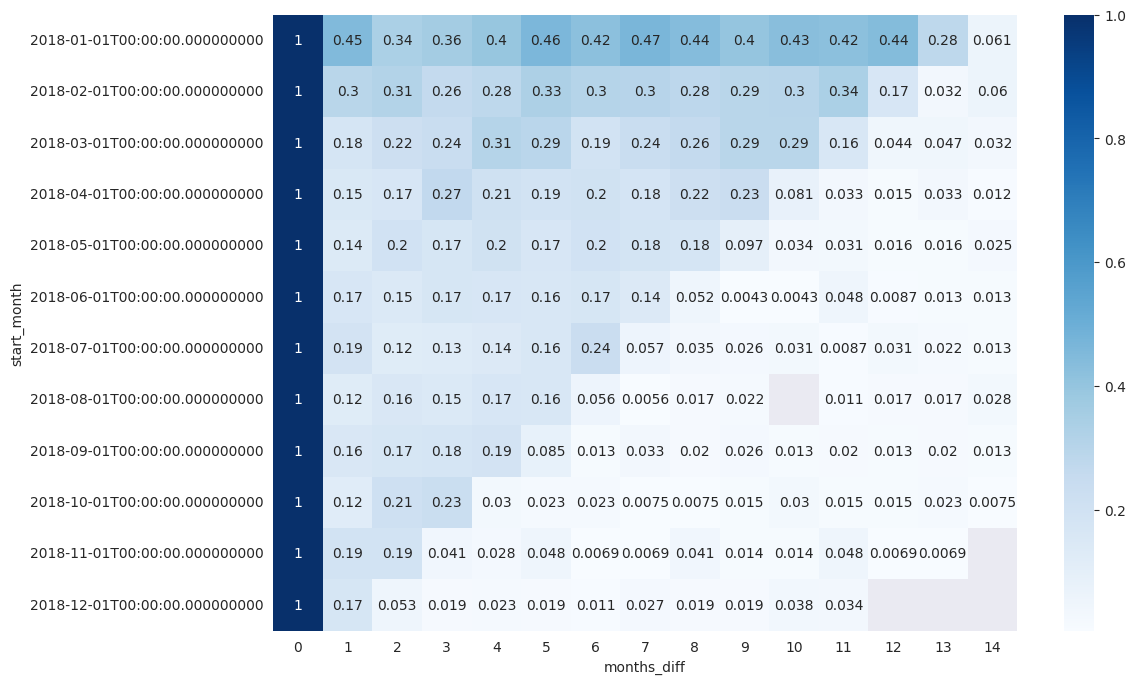

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(uk, annot=True, cmap='Blues')

<AxesSubplot: xlabel='months_diff', ylabel='start_month'>

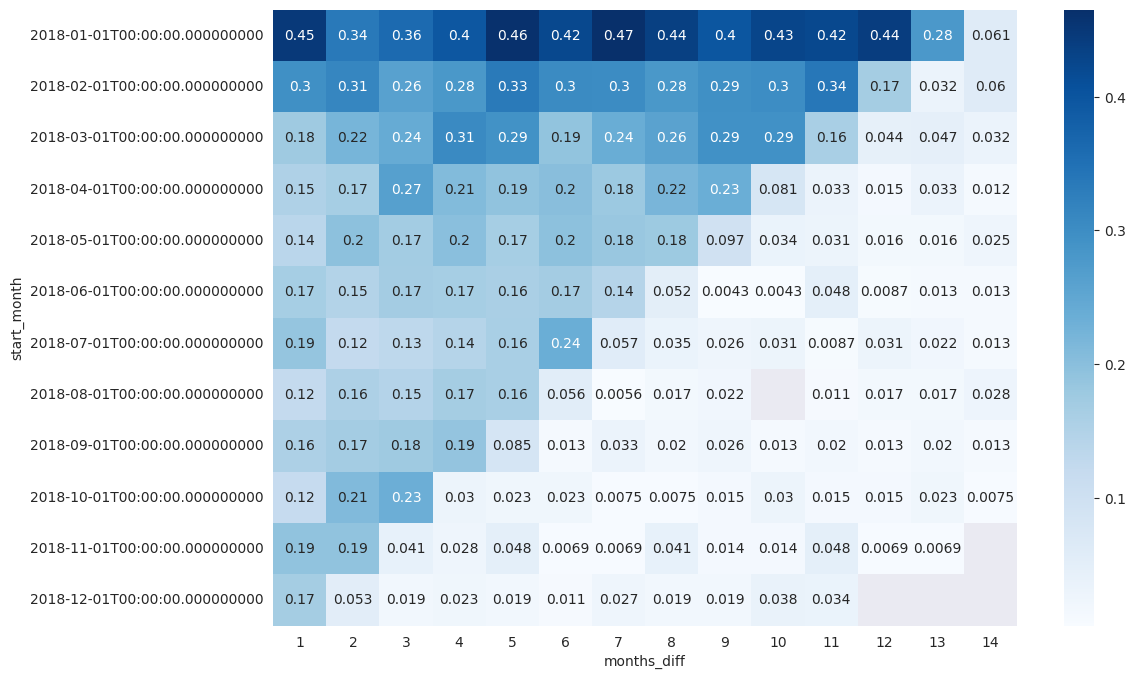

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(uk.iloc[:,1:], annot=True, cmap='Blues')

In [78]:
other_countries = retention.loc[:, 'other', :].iloc[:, :15]
other_countries

months_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
start_month,,,,,,,,,,,,,,,
2018-01-01,1.0,0.420000,0.360000,0.280000,0.420000,0.340000,0.460000,0.460000,0.440000,0.440000,0.340000,0.400000,0.520000,0.320000,0.040000
2018-02-01,1.0,0.305556,0.444444,0.347222,0.305556,0.291667,0.333333,0.291667,0.208333,0.319444,0.416667,0.375000,0.250000,0.013889,0.055556
2018-03-01,1.0,0.142857,0.102041,0.163265,0.224490,0.163265,0.142857,0.224490,0.244898,0.204082,0.326531,0.061224,0.020408,0.040816,0.020408
2018-04-01,1.0,0.240000,0.200000,0.200000,0.260000,0.160000,0.300000,0.100000,0.280000,0.180000,0.100000,NaN,0.020000,NaN,0.020000
2018-05-01,1.0,0.153846,0.192308,0.230769,NaN,0.115385,0.153846,0.269231,0.192308,0.076923,NaN,0.076923,NaN,NaN,NaN
2018-06-01,1.0,0.260870,0.130435,0.217391,0.043478,0.086957,0.173913,0.173913,0.043478,0.043478,NaN,0.043478,NaN,0.043478,NaN
2018-07-01,1.0,0.150000,NaN,0.050000,0.100000,0.400000,0.200000,0.050000,NaN,0.050000,0.050000,NaN,NaN,0.050000,NaN
2018-08-01,1.0,0.125000,0.312500,0.187500,0.250000,0.312500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,1.0,0.200000,0.333333,0.200000,0.133333,0.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066667


<AxesSubplot: xlabel='months_diff', ylabel='start_month'>

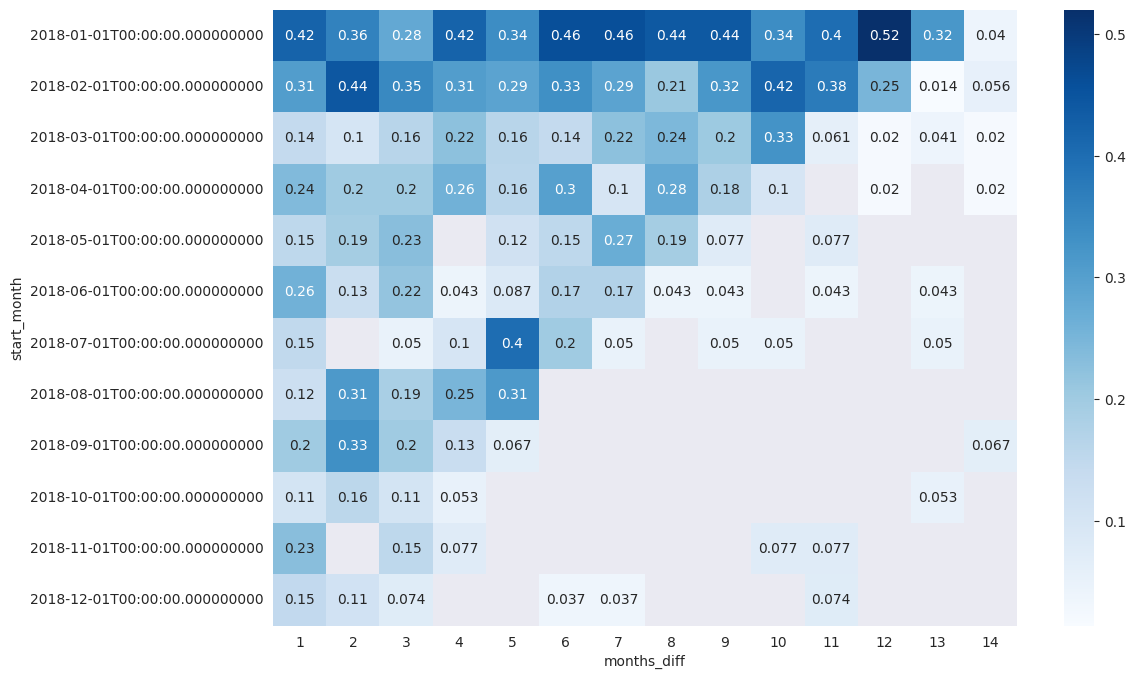

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(other_countries.iloc[:,1:], annot=True, cmap='Blues')